# Решение ОДУ (задачи Коши)

In [1]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt

# Добавляем путь к корневой директории проекта
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from mathmod import ode

In [2]:
y0 = 1
t0 = np.pi / 4
T = np.pi
eps = 0.00001
n = 10
t_arr = np.linspace(t0, T, n + 1, endpoint=True)

In [3]:
def f(t, y):
    return y * np.sin(2 * t)

In [4]:
def a_solve(t):
    return np.exp(- (1 / 2) * np.cos(2 * t))
a_res = a_solve(t_arr)

# Правило Рунге

In [5]:
def runge(method, epsilon, p):
    n = 10
    X, Y = method(n)

    Y1 = Y

    while True:
        n *= 2
       
        X, Y = method(n)
        Y2 = Y[::2]

        eps = max(np.abs(Y1 - Y2) / (2 ** p - 1))

        if eps < epsilon:
            return X, Y, (T - t0) / n, n
        else:
            Y1 = Y

# Метод Эйлера

In [6]:
def euler_method(n):
    X = np.empty(n + 1)
    Y = np.empty(n + 1)

    X[0] = t0
    Y[0] = y0

    h = (T - t0) / n

    for i in range(1, n + 1):
        X[i] = t0 + i * h
        Y[i] = ode.ode_euler(f, Y[i - 1], X[i - 1], h)

    return X, Y

In [7]:
X_euler, Y_euler, h_euler, n_euler = runge(euler_method, eps, 1)

In [8]:
print(f"n = {n_euler}, h = {h_euler}")

n = 327680, h = 7.190534943213943e-06


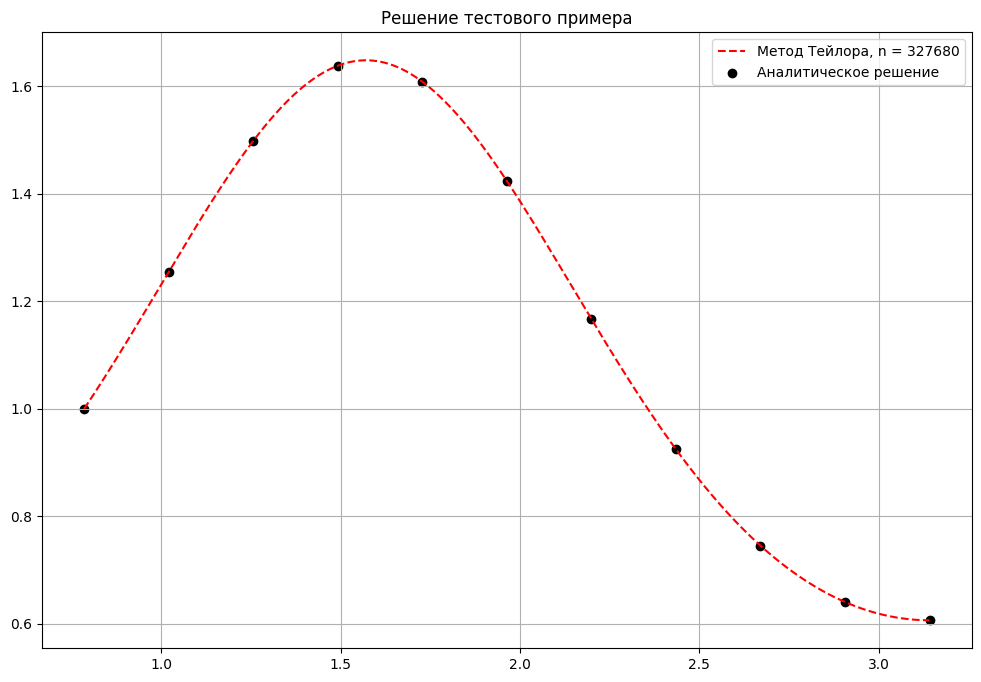

In [9]:
plt.figure(figsize=(12, 8))
plt.title("Решение тестового примера")
plt.plot(X_euler, Y_euler, label=f"Метод Тейлора, n = {n_euler}", linestyle='dashed', color='red')
plt.scatter(t_arr, a_res, label="Аналитическое решение", color='black')
plt.legend()
plt.grid()
plt.show()

# Модифицированный метод Эйлера 2-го порядка

In [10]:
def modified_euler_method(n):
    X = np.empty(n + 1)
    Y = np.empty(n + 1)

    X[0] = t0
    Y[0] = y0

    h = (T - t0) / n

    for i in range(1, n + 1):
        X[i] = t0 + i * h
        Y[i] = ode.ode_modified_euler(f, Y[i - 1], X[i - 1], h)

    return X, Y

In [11]:
X_modified_euler, Y_modified_euler, h_modified_euler, n_modifid_euler = runge(modified_euler_method, eps, 2)

In [33]:
print(f"n = {n_modifid_euler}, h = {h_modified_euler}")

n = 640, h = 0.003681553890925539


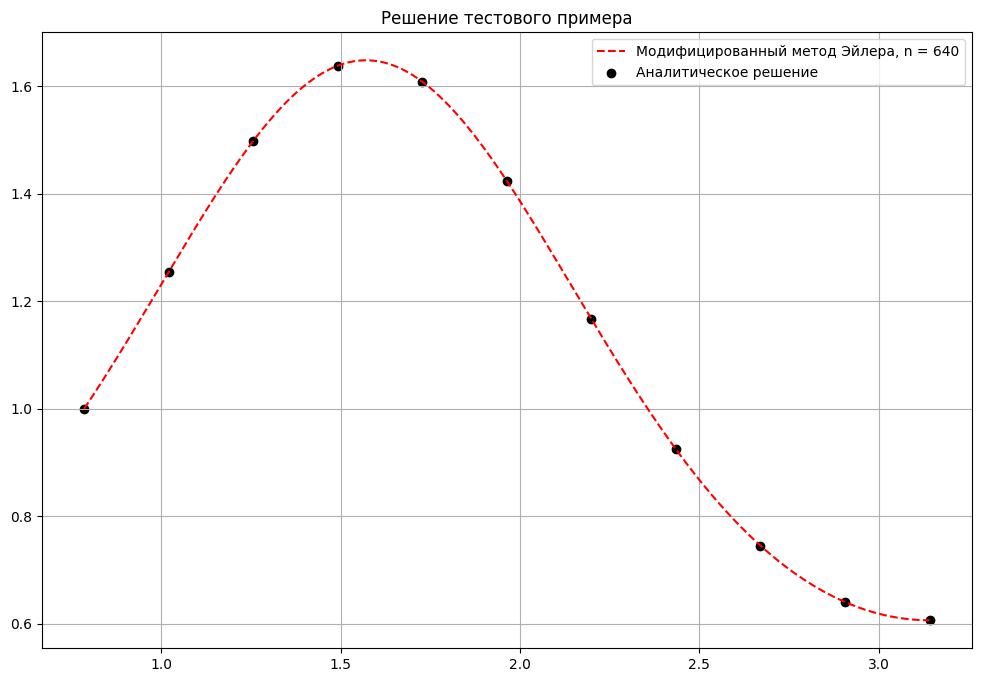

In [34]:
plt.figure(figsize=(12, 8))
plt.title("Решение тестового примера")
plt.plot(X_modified_euler, Y_modified_euler, label=f"Модифицированный метод Эйлера, n = {n_modifid_euler}", linestyle='dashed', color='red')
plt.scatter(t_arr, a_res, label="Аналитическое решение", color='black')
plt.legend()
plt.grid()
plt.show()

# Метод Тейлора

In [12]:
def df_t(t, y):
    return y * 2 * np.cos(2 * t)

def df_y(t, y):
    return np.sin(2 * t)


In [13]:
def teylor_method(n):
    X = np.empty(n + 1)
    Y = np.empty(n + 1)

    X[0] = t0
    Y[0] = y0

    h = (T - t0) / n

    for i in range(1, n + 1):
        X[i] = t0 + i * h
        Y[i] = ode.ode_teylor(f, df_t, df_y, Y[i - 1], X[i - 1], h)

    return X, Y


In [14]:
X_teylor, Y_teylor, h_teylor, n_teylor = runge(teylor_method, eps, 2)

In [15]:
print(f"n = {n_teylor}, h = {h_teylor}")

n = 1280, h = 0.0018407769454627694


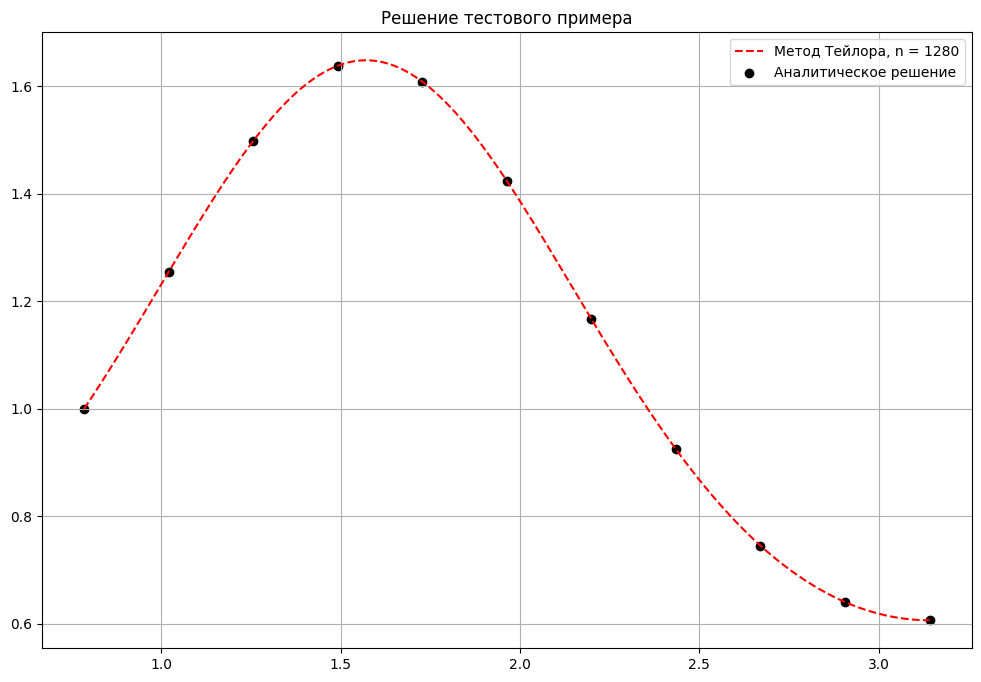

In [16]:
plt.figure(figsize=(12, 8))
plt.title("Решение тестового примера")
plt.plot(X_teylor, Y_teylor, label=f"Метод Тейлора, n = {n_teylor}", linestyle='dashed', color='red')
plt.scatter(t_arr, a_res, label="Аналитическое решение", color='black')
plt.legend()
plt.grid()
plt.show()

# Усовершенствованный метод Эйлера 2-го порядка

In [17]:
def improved_euler_method(n):
    X = np.empty(n + 1)
    Y = np.empty(n + 1)

    X[0] = t0
    Y[0] = y0

    h = (T - t0) / n

    for i in range(1, n + 1):
        X[i] = t0 + i * h
        Y[i] = ode.ode_improved_euler(f, Y[i - 1], X[i - 1], h)

    return X, Y


In [18]:
X_improved_euler, Y_improved_euler, h_improved_euler, n_improved_euler = runge(improved_euler_method, eps, 2)

In [19]:
print(f"n = {n_improved_euler}, h = {h_improved_euler}")

n = 640, h = 0.003681553890925539


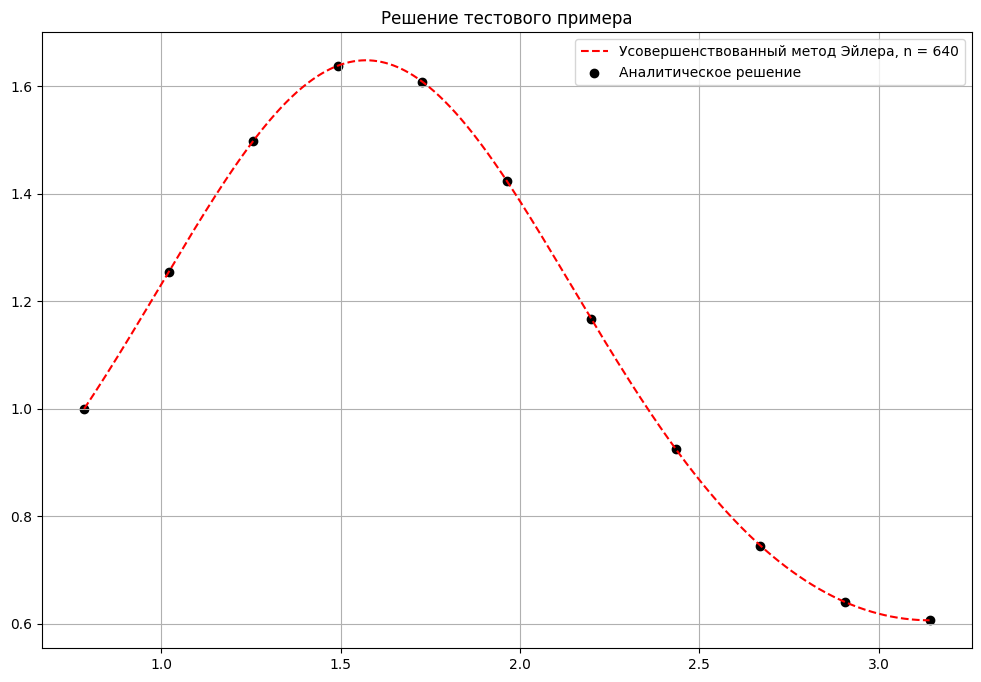

In [20]:
plt.figure(figsize=(12, 8))
plt.title("Решение тестового примера")
plt.plot(X_improved_euler, Y_improved_euler, label=f"Усовершенствованный метод Эйлера, n = {n_improved_euler}", linestyle='dashed', color='red')
plt.scatter(t_arr, a_res, label="Аналитическое решение", color='black')
plt.legend()
plt.grid()
plt.show()

# Метод Рунге-Кутты 3-го порядка

In [21]:
def runge_kutta_third(n):
    X = np.empty(n + 1)
    Y = np.empty(n + 1)

    X[0] = t0
    Y[0] = y0

    h = (T - t0) / n

    for i in range(1, n + 1):
        X[i] = t0 + i * h
        Y[i] = ode.ode_runge_kutta_third(f, Y[i - 1], X[i - 1], h)

    return X, Y


In [22]:
X_runge_kutta_third, Y_runge_kutta_third, h_runge_kutta_third, n_runge_kutta_third = runge(runge_kutta_third, eps, 3)

In [23]:
print(f"n = {n_runge_kutta_third}, h = {h_runge_kutta_third}")

n = 80, h = 0.02945243112740431


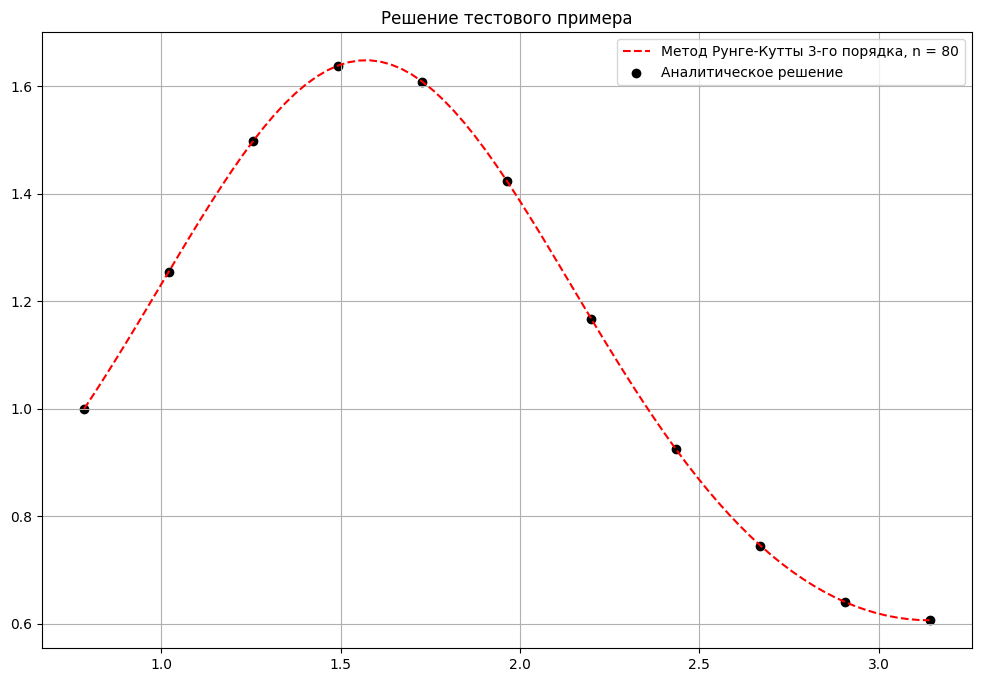

In [24]:
plt.figure(figsize=(12, 8))
plt.title("Решение тестового примера")
plt.plot(X_runge_kutta_third, Y_runge_kutta_third, label=f"Метод Рунге-Кутты 3-го порядка, n = {n_runge_kutta_third}", linestyle='dashed', color='red')
plt.scatter(t_arr, a_res, label="Аналитическое решение", color='black')
plt.legend()
plt.grid()
plt.show()

# Метод Рунге-Кутты 4-го порядка

In [25]:
def runge_kutta_fourth(n):
    X = np.empty(n + 1)
    Y = np.empty(n + 1)

    X[0] = t0
    Y[0] = y0

    h = (T - t0) / n

    for i in range(1, n + 1):
        X[i] = t0 + i * h
        Y[i] = ode.ode_runge_kutta_fourth(f, Y[i - 1], X[i - 1], h)

    return X, Y


In [26]:
X_runge_kutta_fourth, Y_runge_kutta_fourth, h_runge_kutta_fourth, n_runge_kutta_fourth = runge(runge_kutta_fourth, eps, 4)

In [27]:
print(f"n = {n_runge_kutta_fourth}, h = {h_runge_kutta_fourth}")

n = 20, h = 0.11780972450961724


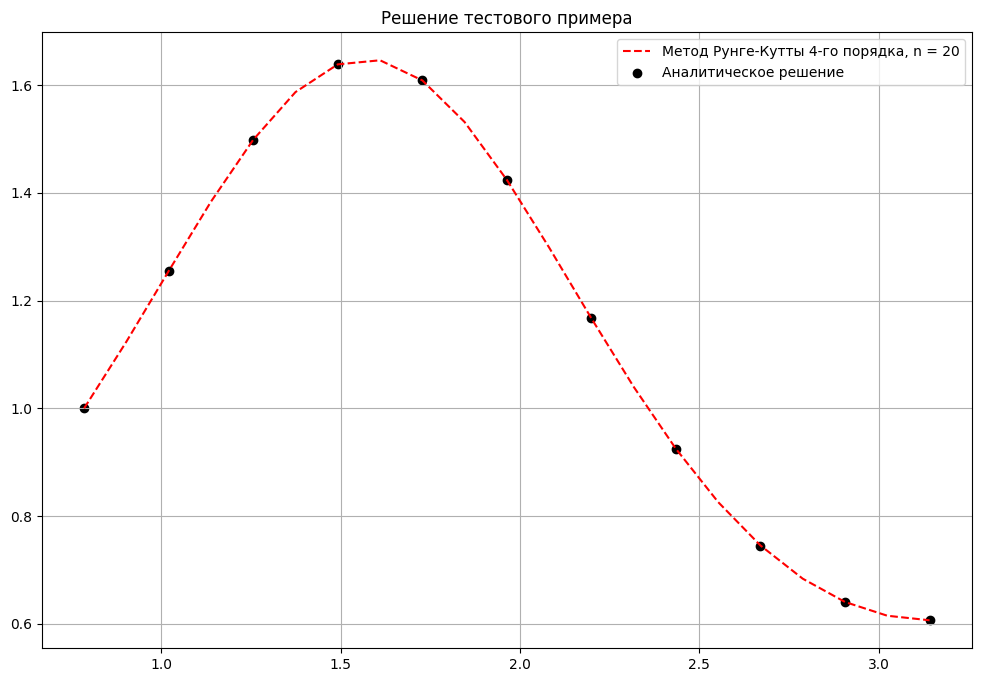

In [28]:
plt.figure(figsize=(12, 8))
plt.title("Решение тестового примера")
plt.plot(X_runge_kutta_fourth, Y_runge_kutta_fourth, label=f"Метод Рунге-Кутты 4-го порядка, n = {n_runge_kutta_fourth}", linestyle='dashed', color='red')
plt.scatter(t_arr, a_res, label="Аналитическое решение", color='black')
plt.legend()
plt.grid()
plt.show()

# Экстраполяционный метод Aдамса 2-го порядка

In [29]:
def exstrapol_adams_method(n):
    X = np.empty(n + 1)
    Y = np.empty(n + 1)

    X[0] = t0
    Y[0] = y0

    h = (T - t0) / n

    X[1] = t0 + h
    Y[1] = ode.ode_runge_kutta_fourth(f, Y[0], X[0], h)

    for i in range(2, n + 1):
        X[i] = t0 + i * h
        Y[i] = ode.ode_exstrapol_adams(f, Y[i - 1], X[i - 1], Y[i - 2], X[i -2], h)

    return X, Y

In [30]:
X_exstrapol_adams, Y_exstrapol_adams, h_exstrapol_adams, n_exstrapol_adams = runge(exstrapol_adams_method, eps, 2)

In [31]:
print(f"n = {n_exstrapol_adams}, h = {h_exstrapol_adams}")

n = 1280, h = 0.0018407769454627694


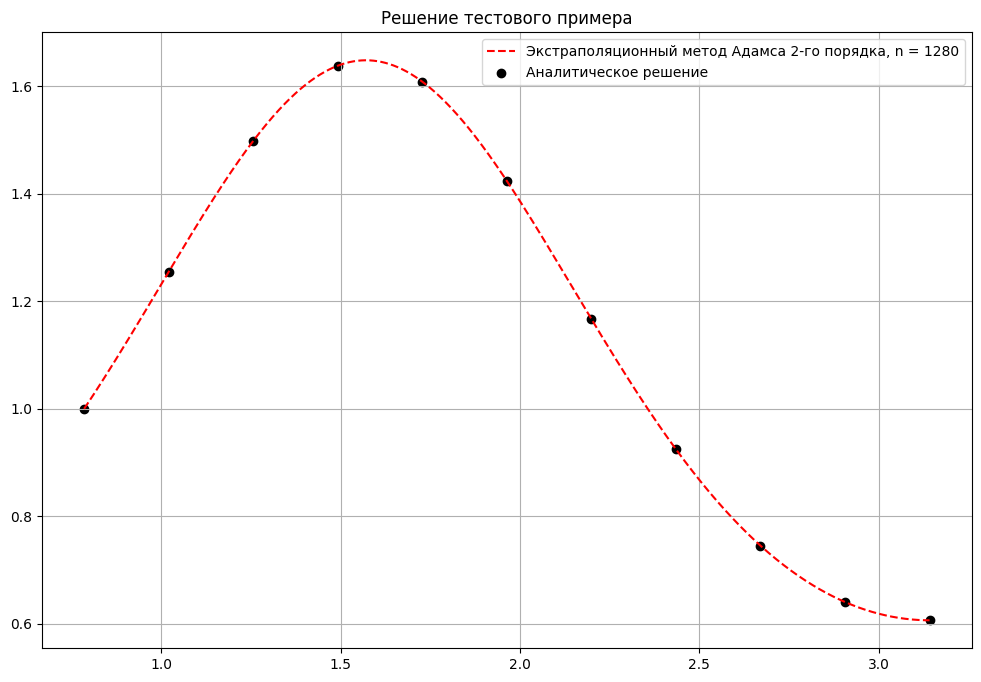

In [32]:
plt.figure(figsize=(12, 8))
plt.title("Решение тестового примера")
plt.plot(X_exstrapol_adams, Y_exstrapol_adams, label=f"Экстраполяционный метод Адамса 2-го порядка, n = {n_exstrapol_adams}", linestyle='dashed', color='red')
plt.scatter(t_arr, a_res, label="Аналитическое решение", color='black')
plt.legend()
plt.grid()
plt.show()